**Context**


Este conjunto de datos forma parte de mi tesis de maestría "Sistema de monitoreo de colmenas inteligente basado en aprendizaje automático sin red de Internet".
Datos recopilados de las colmenas número 17, 36 y 85 en un colmenar ubicado en **Çanakkale, Turquía.**

Los datos se utilizaron con algoritmos de detección de anomalías no supervisados ​​para determinar los **valores críticos** de **temperatura** y **humedad relativa** para calibrar el sistema de alarma.

Los resultados mostraron que **las anomalías fatales se pueden detectar semanas antes de la pérdida de la colonia.**

**Contenido**

+1000 filas y 10 columnas.
La descripción de las columnas se enumera a continuación.

* *DateTime* : Fecha y hora en formato "dd.mm.aaaa hh:mm"
* *T17* : Temperatura de la colmena 17
* *RH17* : Humedad relativa de la colmena 17
* *AT17* : Temperatura aparente de la colmena 17
* *Tamb* : Temperatura ambiente
* *RHamb* : Humedad relativa ambiente
* *ATamb* : Temperatura ambiente aparente
* *T17-Tamb* : T17 - Tamb
* *AT17-ATamb* : AT17 - ATamb

In [1]:
import pandas as pd

df_hive17 = pd.read_csv('/content/data/Hive17.csv',sep=';')
df_hive36 = pd.read_csv('/content/data/Hive36.csv',sep=';')
df_hive85 = pd.read_csv('/content/data/Hive85.csv',sep=';')
df_hive17.columns

Index(['Hour', 'DateTime', 'T17', 'RH17', 'AT17', 'Tamb', 'RHamb', 'ATamb',
       'T17-Tamb', 'AT17-ATamb'],
      dtype='object')

In [2]:
df_hive17['Hive'] = 17
df_hive17 = df_hive17.rename(columns={'T17': 'T',
                          'RH17': 'RH',
                          'AT17': 'AT',
                          'T17-Tamb':'T-Tamb',
                          'AT17-ATamb':'AT-ATamb'})
df_hive17.head()

,Hour,DateTime,T,RH,AT,Tamb,RHamb,ATamb,T-Tamb,AT-ATamb,Hive
0,1,21.08.2021 14:00,32.8,47,36.6,28.8,33,29.1,4.0,7.5,17
1,2,21.08.2021 15:00,33.3,46,37.1,28.8,36,29.5,4.5,7.6,17
2,3,21.08.2021 16:00,33.5,46,37.4,28.9,35,29.5,4.6,7.9,17
3,4,21.08.2021 17:00,33.8,49,38.5,28.5,36,29.1,5.3,9.3,17
4,5,21.08.2021 18:00,33.8,51,38.8,27.5,40,28.4,6.3,10.4,17


In [3]:
df_hive17.shape

(1847, 11)

In [4]:
df_hive36['Hive'] = 36
df_hive36 = df_hive36.rename(columns={'T36': 'T',
                          'RH36': 'RH',
                          'AT36': 'AT',
                          'T36-Tamb':'T-Tamb',
                          'AT36-ATamb':'AT-ATamb'})
df_hive36.head()

,Hour,DateTime,T,RH,AT,Tamb,RHamb,ATamb,T-Tamb,AT-ATamb,Hive
0,1847,6.11.2021 12:00,29.2,66,34.3,23.6,49,24.3,5.6,10.0,36
1,1848,6.11.2021 13:00,27.3,71,31.9,25.1,43,25.5,2.2,6.4,36
2,1849,6.11.2021 14:00,28.3,69,33.2,25.7,40,26.0,2.6,7.3,36
3,1850,6.11.2021 15:00,29.3,67,34.5,24.6,49,25.6,4.7,8.9,36
4,1851,6.11.2021 16:00,30.1,66,35.5,23.4,51,24.2,6.7,11.3,36


In [5]:
df_hive36.shape

(4227, 11)

In [6]:
df_hive85['Hive'] = 85
df_hive85 = df_hive85.rename(columns={'T85': 'T',
                          'RH85': 'RH',
                          'AT85': 'AT',
                          'T85-Tamb':'T-Tamb',
                          'AT85-ATamb':'AT-ATamb'})
df_hive85.head()

,Hour,DateTime,T,RH,AT,Tamb,RHamb,ATamb,T-Tamb,AT-ATamb,Hive
0,1,21.08.2021 14:00,36.3,78,48.4,28.8,33,29.1,7.5,19.3,85
1,2,21.08.2021 15:00,34.9,83,46.7,28.8,36,29.5,6.1,17.1,85
2,3,21.08.2021 16:00,34.1,87,45.9,28.9,35,29.5,5.2,16.4,85
3,4,21.08.2021 17:00,34.2,89,46.5,28.5,36,29.1,5.7,17.4,85
4,5,21.08.2021 18:00,33.9,90,46.2,27.5,40,28.4,6.4,17.8,85


In [7]:
df_hive = pd.merge(df_hive17, df_hive36, how='outer').merge(df_hive85, how='outer')

df_hive[['Fecha', 'Hora']] = df_hive['DateTime'].str.split(' ', expand=True)

df_hive.drop('DateTime', axis=1, inplace=True)

first_column = df_hive.columns[0]

cols = [first_column, 'Fecha', 'Hora'] + [col for col in df_hive.columns if col not in [first_column, 'Fecha', 'Hora']]
df_hive = df_hive[cols]

df_hive.head()

,Hour,Fecha,Hora,T,RH,AT,Tamb,RHamb,ATamb,T-Tamb,AT-ATamb,Hive
0,1,21.08.2021,14:00,32.8,47,36.6,28.8,33,29.1,4.0,7.5,17
1,2,21.08.2021,15:00,33.3,46,37.1,28.8,36,29.5,4.5,7.6,17
2,3,21.08.2021,16:00,33.5,46,37.4,28.9,35,29.5,4.6,7.9,17
3,4,21.08.2021,17:00,33.8,49,38.5,28.5,36,29.1,5.3,9.3,17
4,5,21.08.2021,18:00,33.8,51,38.8,27.5,40,28.4,6.3,10.4,17


In [8]:
df_hive['Hive'].value_counts()

,count
Hive,
85,6073
36,4227
17,1847


In [9]:
df_hive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12147 entries, 0 to 12146
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hour      12147 non-null  int64  
 1   Fecha     12147 non-null  object 
 2   Hora      12147 non-null  object 
 3   T         12147 non-null  float64
 4   RH        12147 non-null  int64  
 5   AT        12147 non-null  float64
 6   Tamb      12147 non-null  float64
 7   RHamb     12147 non-null  int64  
 8   ATamb     12147 non-null  float64
 9   T-Tamb    12147 non-null  float64
 10  AT-ATamb  12147 non-null  float64
 11  Hive      12147 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 1.1+ MB


In [10]:
df_hive = df_hive.rename(columns= {'Hour':'Hora','T':'Temp','RH':'humRel','AT':'tempApte',
                         'Tamb':'tempAmbte','RHamb':'humRelAmbte','ATamb':'tempApteAmbte',
                         'T-Tamb':'difTemp','AT-ATamb':'difTempApte'})
df_hive.head()

,Hora,Fecha,Hora,Temp,humRel,tempApte,tempAmbte,humRelAmbte,tempApteAmbte,difTemp,difTempApte,Hive
0,1,21.08.2021,14:00,32.8,47,36.6,28.8,33,29.1,4.0,7.5,17
1,2,21.08.2021,15:00,33.3,46,37.1,28.8,36,29.5,4.5,7.6,17
2,3,21.08.2021,16:00,33.5,46,37.4,28.9,35,29.5,4.6,7.9,17
3,4,21.08.2021,17:00,33.8,49,38.5,28.5,36,29.1,5.3,9.3,17
4,5,21.08.2021,18:00,33.8,51,38.8,27.5,40,28.4,6.3,10.4,17


In [11]:
df_hive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12147 entries, 0 to 12146
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hora           12147 non-null  int64  
 1   Fecha          12147 non-null  object 
 2   Hora           12147 non-null  object 
 3   Temp           12147 non-null  float64
 4   humRel         12147 non-null  int64  
 5   tempApte       12147 non-null  float64
 6   tempAmbte      12147 non-null  float64
 7   humRelAmbte    12147 non-null  int64  
 8   tempApteAmbte  12147 non-null  float64
 9   difTemp        12147 non-null  float64
 10  difTempApte    12147 non-null  float64
 11  Hive           12147 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 1.1+ MB


In [13]:
df_hive.columns

Index(['Hora', 'Fecha', 'Hora', 'Temp', 'humRel', 'tempApte', 'tempAmbte',
       'humRelAmbte', 'tempApteAmbte', 'difTemp', 'difTempApte', 'Hive'],
      dtype='object')

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Suprimir warnings específicos
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in log")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="divide by zero encountered in log")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in true_divide")

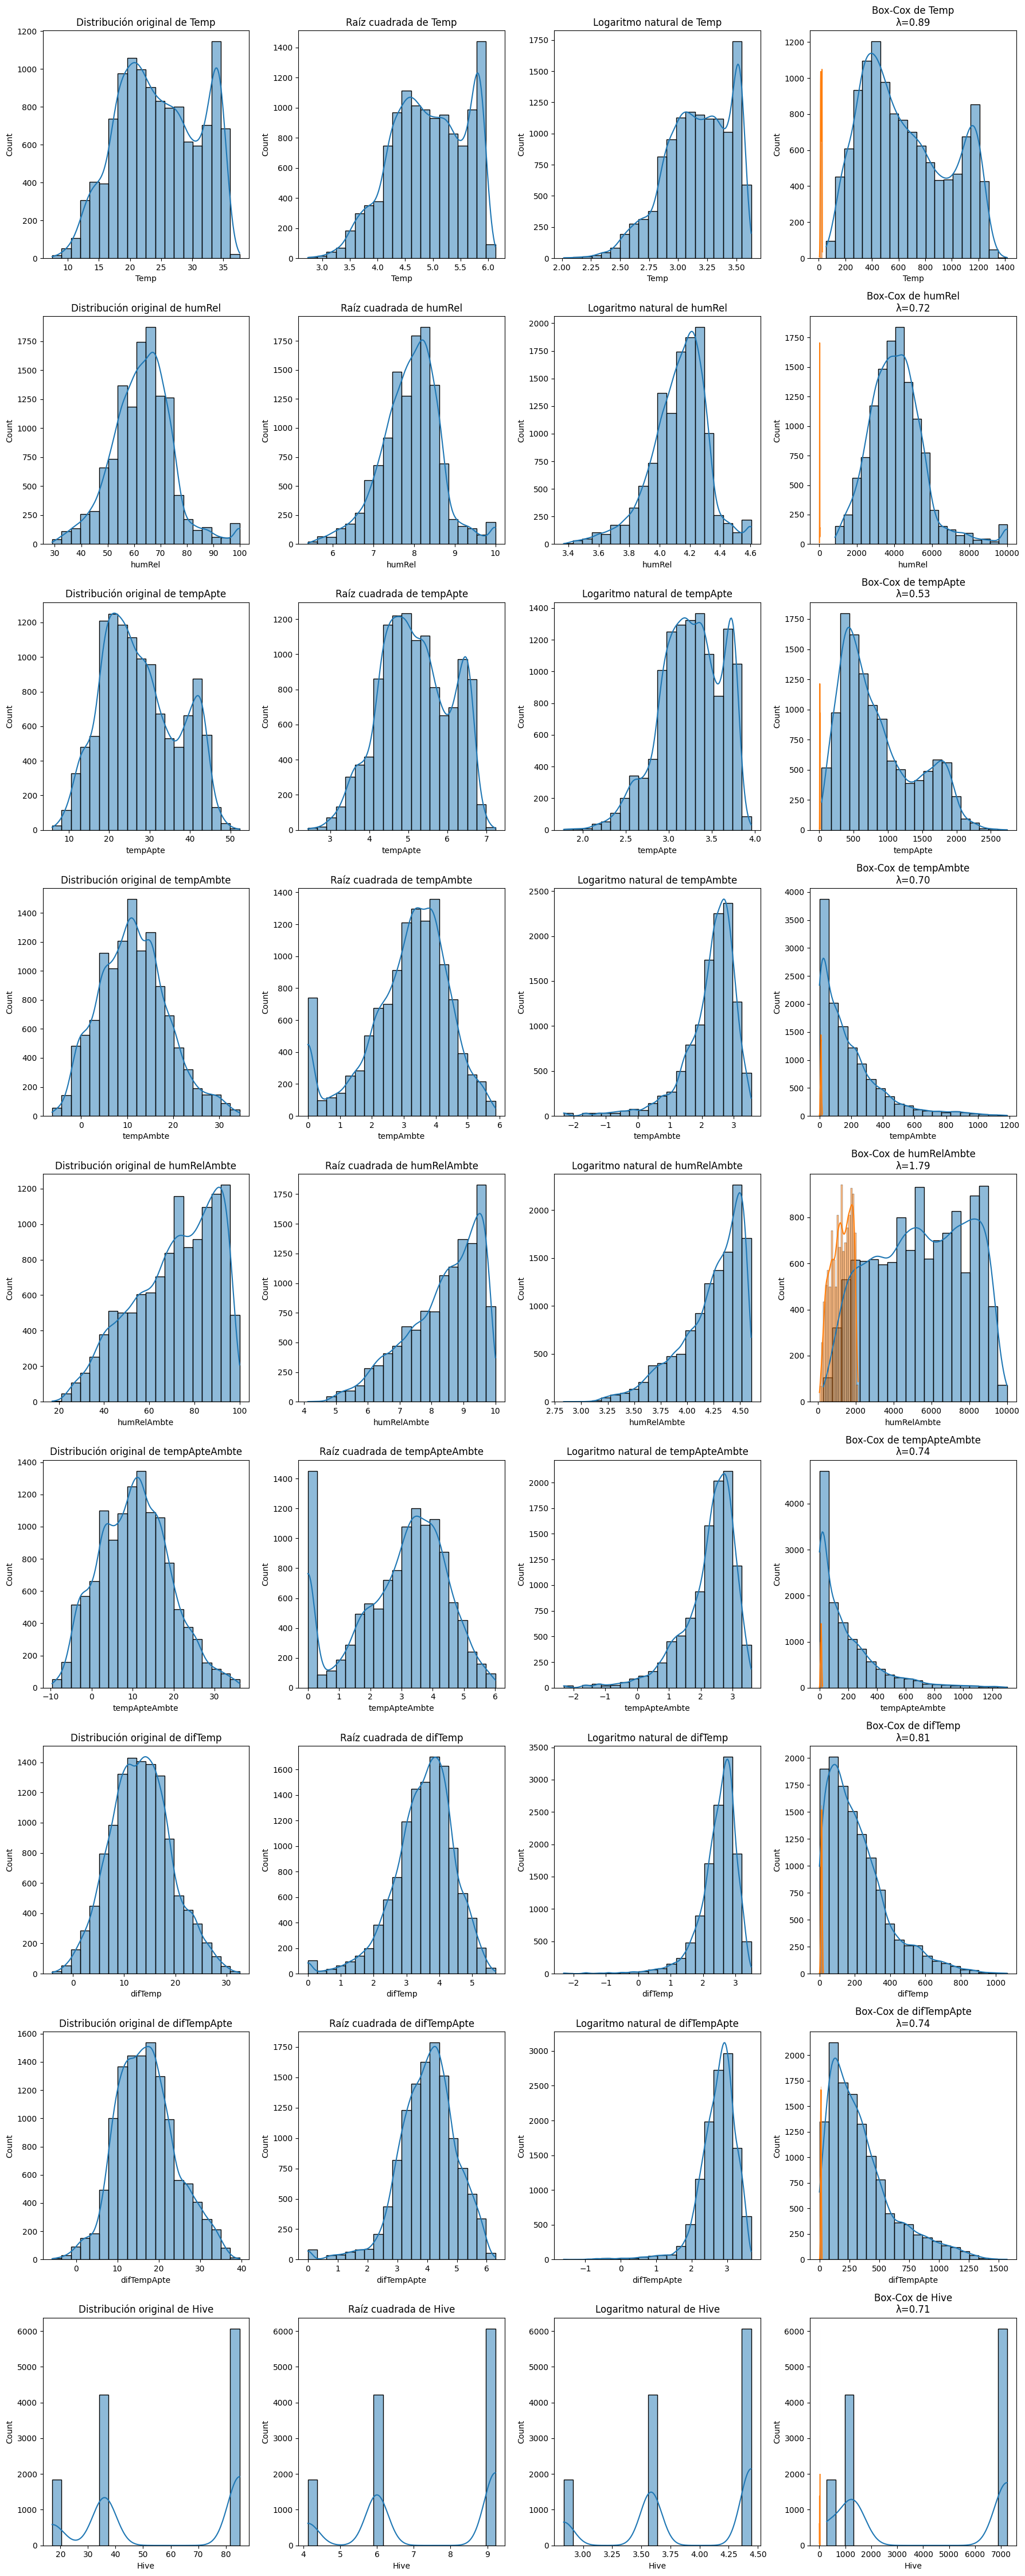

In [21]:
# Columnas numéricas de interés
columns_of_interest = ['Temp', 'humRel', 'tempApte', 'tempAmbte','humRelAmbte', 'tempApteAmbte', 'difTemp', 'difTempApte', 'Hive']

# Crear una figura con subplots para cada columna y transformación
num_cols = len(columns_of_interest)
fig, axs = plt.subplots(num_cols, 4, figsize=(18, 5 * num_cols))

for i, col in enumerate(columns_of_interest):
    # Datos originales
    sns.histplot(df_hive[col], bins=20, kde=True, ax=axs[i, 0])
    axs[i, 0].set_title(f'Distribución original de {col}')

    # Raíz cuadrada
    sqrt_data = np.sqrt(df_hive[col].clip(lower=0))  # Clip para evitar valores negativos
    sns.histplot(sqrt_data, bins=20, kde=True, ax=axs[i, 1])
    axs[i, 1].set_title(f'Raíz cuadrada de {col}')

    # Logaritmo natural
    log_data = np.log(df_hive[col].replace(0, np.nan).dropna())  # Manejar ceros y valores negativos
    sns.histplot(log_data, bins=20, kde=True, ax=axs[i, 2])
    axs[i, 2].set_title(f'Logaritmo natural de {col}')

    # Potencia 2
    power2_data = np.power(df_hive[col], 2)
    sns.histplot(power2_data, bins=20, kde=True, ax=axs[i, 3])
    axs[i, 3].set_title(f'Potencia 2 de {col}')

    # Box-Cox
    # Para Box-Cox, necesitamos que los datos sean estrictamente positivos
    col_data = df_hive[col]
    min_value = col_data.min()
    if min_value <= 0:
        col_data = col_data - min_value + 1  # Shift data to be positive

    col_data, fitted_lambda = stats.boxcox(col_data)
    sns.histplot(col_data, bins=20, kde=True, ax=axs[i, 3])
    axs[i, 3].set_title(f'Box-Cox de {col}\nλ={fitted_lambda:.2f}')

# Ajustar el layout
plt.tight_layout()
plt.show()

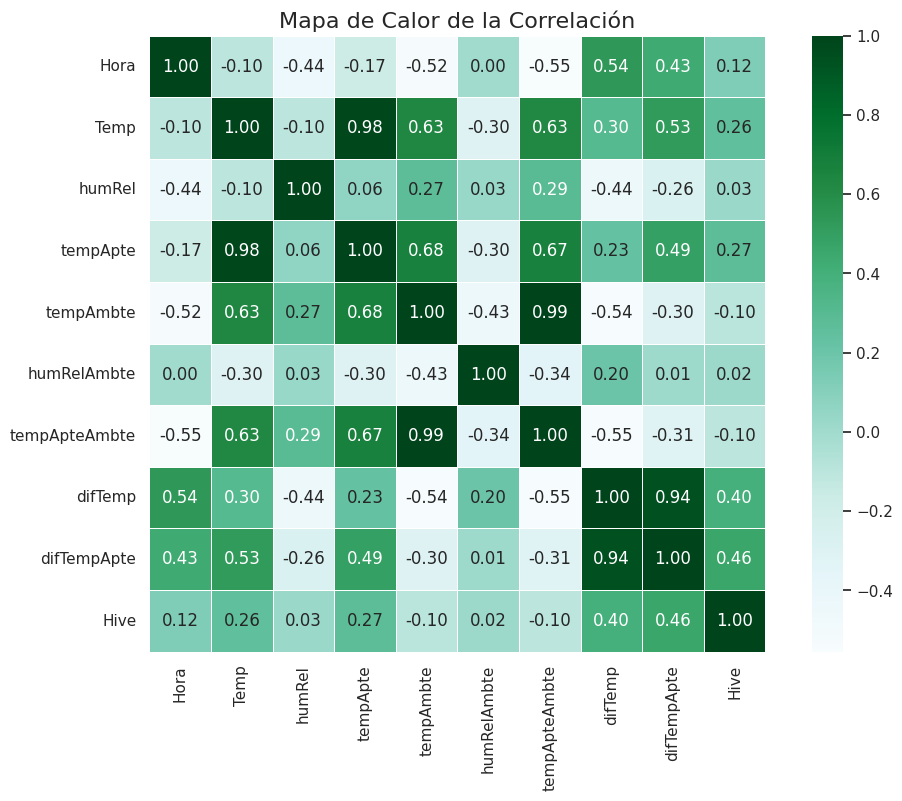

In [26]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

df_hive_numeric = df_hive.select_dtypes(include=[float, int])
df_hive_corr = df_hive_numeric.corr(method='pearson')

# Crear el mapa de calor
ax = sns.heatmap(df_hive_corr, annot=True, cmap='BuGn', fmt='.2f', linewidths=0.5, square=True)

# Ajustar el título del gráfico
plt.title('Mapa de Calor de la Correlación', fontsize=16)

# Mostrar el gráfico
plt.show()